In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("darkgrid")

In [30]:
# Load the inference pickle file
with open('/storage/vbutoi/scratch/ESE/records/inference_stats.pkl', 'rb') as f:
    all_logs = pickle.load(f)

In [31]:
all_logs

subj_idx  slice  label_predicted  label_amount metric  \
0              0      0              0.0           0.0    ECE   
1              0      0              0.0           0.0    ECE   
2              0      0              0.0           0.0    ESE   
3              0      0              0.0           0.0    ESE   
4              0      0              0.0           0.0   ReCE   
...          ...    ...              ...           ...    ...   
165883         6    255              0.0           0.0    ECE   
165884         6    255              0.0           0.0    ESE   
165885         6    255              0.0           0.0    ESE   
165886         6    255              0.0           0.0   ReCE   
165887         6    255              0.0           0.0   ReCE   

       metric_weighting  metric_score  \
0               uniform  0.000000e+00   
1              weighted  0.000000e+00   
2               uniform  4.350782e-08   
3              weighted  4.350782e-07   
4               uniform  4.350782e-08   
...                 ...           ...   
165883         weighted  0.000000e+00   
165884          uniform  4.350782e-08   
165885         weighted  4.350782e-07   
165886          uniform  4.350782e-08   
165887         weighted  4.350782e-07   

                                              metric_bins  \
0                               (0.0, 0.0, 0.0, 0.0, 0.0)   
1                               (0.0, 0.0, 0.0, 0.0, 0.0)   
2       (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3       (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4       (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                   ...   
165883                          (0.0, 0.0, 0.0, 0.0, 0.0)   
165884  (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
165885  (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
165886  (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
165887  (4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               bin_counts  accuracy  \
0                               (0.0, 0.0, 0.0, 0.0, 0.0)       1.0   
1                               (0.0, 0.0, 0.0, 0.0, 0.0)       1.0   
2       (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...       1.0   
3       (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...       1.0   
4       (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1.0   
...                                                   ...       ...   
165883                          (0.0, 0.0, 0.0, 0.0, 0.0)       1.0   
165884  (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...       1.0   
165885  (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...       1.0   
165886  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1.0   
165887  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1.0   

        weighted_accuracy  dice       task  split  
0                     1.0   1.0  Singapore  train  
1                     1.0   1.0  Singapore  train  
2                     1.0   1.0  Singapore  train  
3                     1.0   1.0  Singapore  train  
4                     1.0   1.0  Singapore  train  
...                   ...   ...        ...    ...  
165883                1.0   1.0  Amsterdam    cal  
165884                1.0   1.0  Amsterdam    cal  
165885                1.0   1.0  Amsterdam    cal  
165886                1.0   1.0  Amsterdam    cal  
165887                1.0   1.0  Amsterdam    cal  

[165888 rows x 14 columns]

In [32]:
all_logs.keys()

Index(['subj_idx', 'slice', 'label_predicted', 'label_amount', 'metric',
       'metric_weighting', 'metric_score', 'metric_bins', 'bin_counts',
       'accuracy', 'weighted_accuracy', 'dice', 'task', 'split'],
      dtype='object')

In [33]:
example = all_logs.iloc[0]
for field in example.keys():
    print(field, type(example[field]), ":", example[field])

subj_idx <class 'numpy.int64'> : 0
slice <class 'numpy.int64'> : 0
label_predicted <class 'numpy.float64'> : 0.0
label_amount <class 'numpy.float64'> : 0.0
metric <class 'str'> : ECE
metric_weighting <class 'str'> : uniform
metric_score <class 'numpy.float64'> : 0.0
metric_bins <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
accuracy <class 'numpy.float64'> : 1.0
weighted_accuracy <class 'numpy.float64'> : 1.0
dice <class 'numpy.float64'> : 1.0
task <class 'str'> : Singapore
split <class 'str'> : train


# First let's look at how (for this model) dice and accuracy are related.

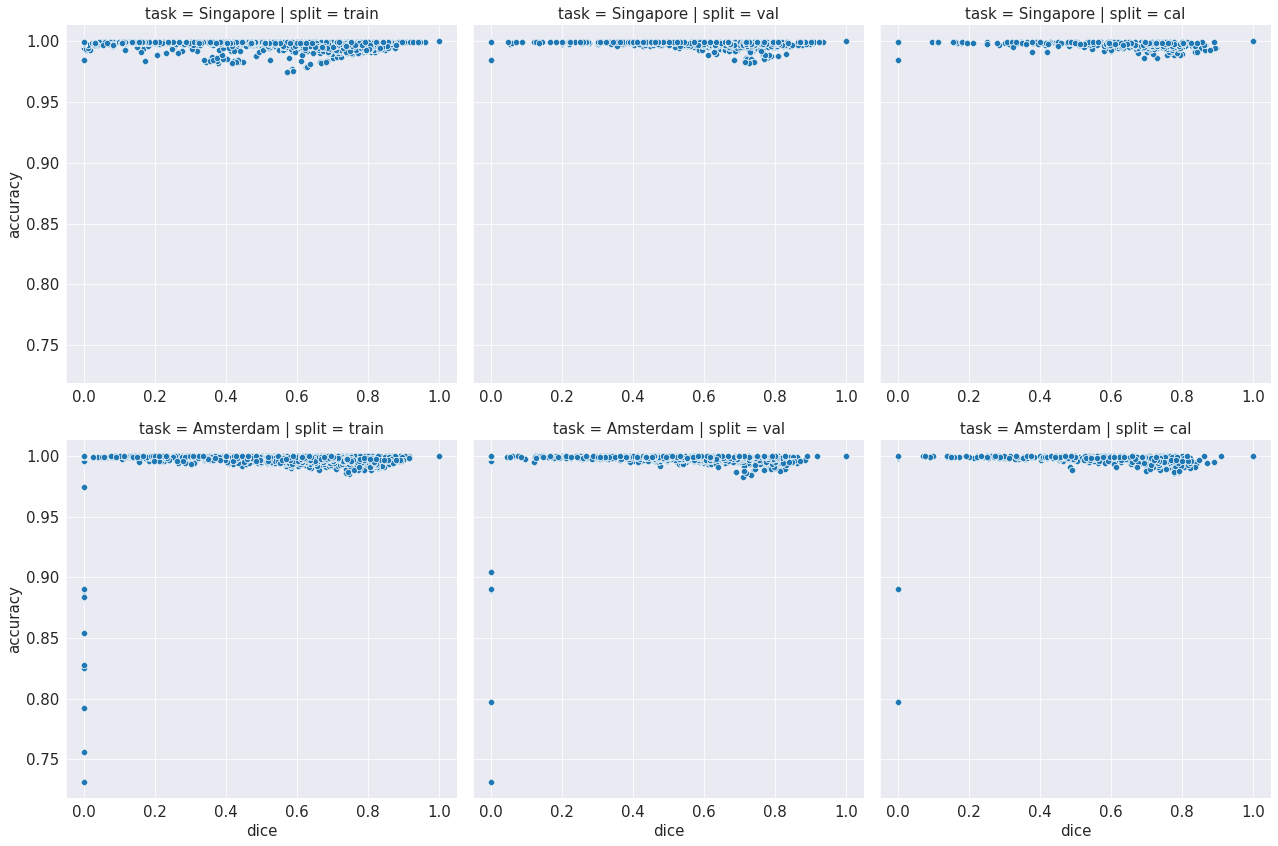

In [34]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='dice',
    y='accuracy',
    row='task',
    col='split',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

In [35]:
# Isolate the cases which have no-label and cases where there is at least some label.
def has_label(value):
    return (value != 0.0)

def weighted_metric(metric, weighting):
    return f"{metric}_{weighting}"

# Add some new useful columns
all_logs['has_label'] = all_logs['label_amount'].apply(has_label) 
all_logs['weighted_metric'] = all_logs.apply(lambda row: weighted_metric(row['metric'], row['metric_weighting']), axis=1)

# Drop some columns we won't use like metric_bins, and bin_counts
all_logs = all_logs.drop(columns=['metric_bins', 'bin_counts'])

def reorder_splits(df):
    train_logs = df[df['split'] == 'train']
    val_logs = df[df['split'] == 'val']
    cal_logs = df[df['split'] == 'cal']
    fixed_df = pd.concat([train_logs, val_logs, cal_logs])
    return fixed_df

# Set the rows so that it's train, val, cal
all_logs = reorder_splits(all_logs)

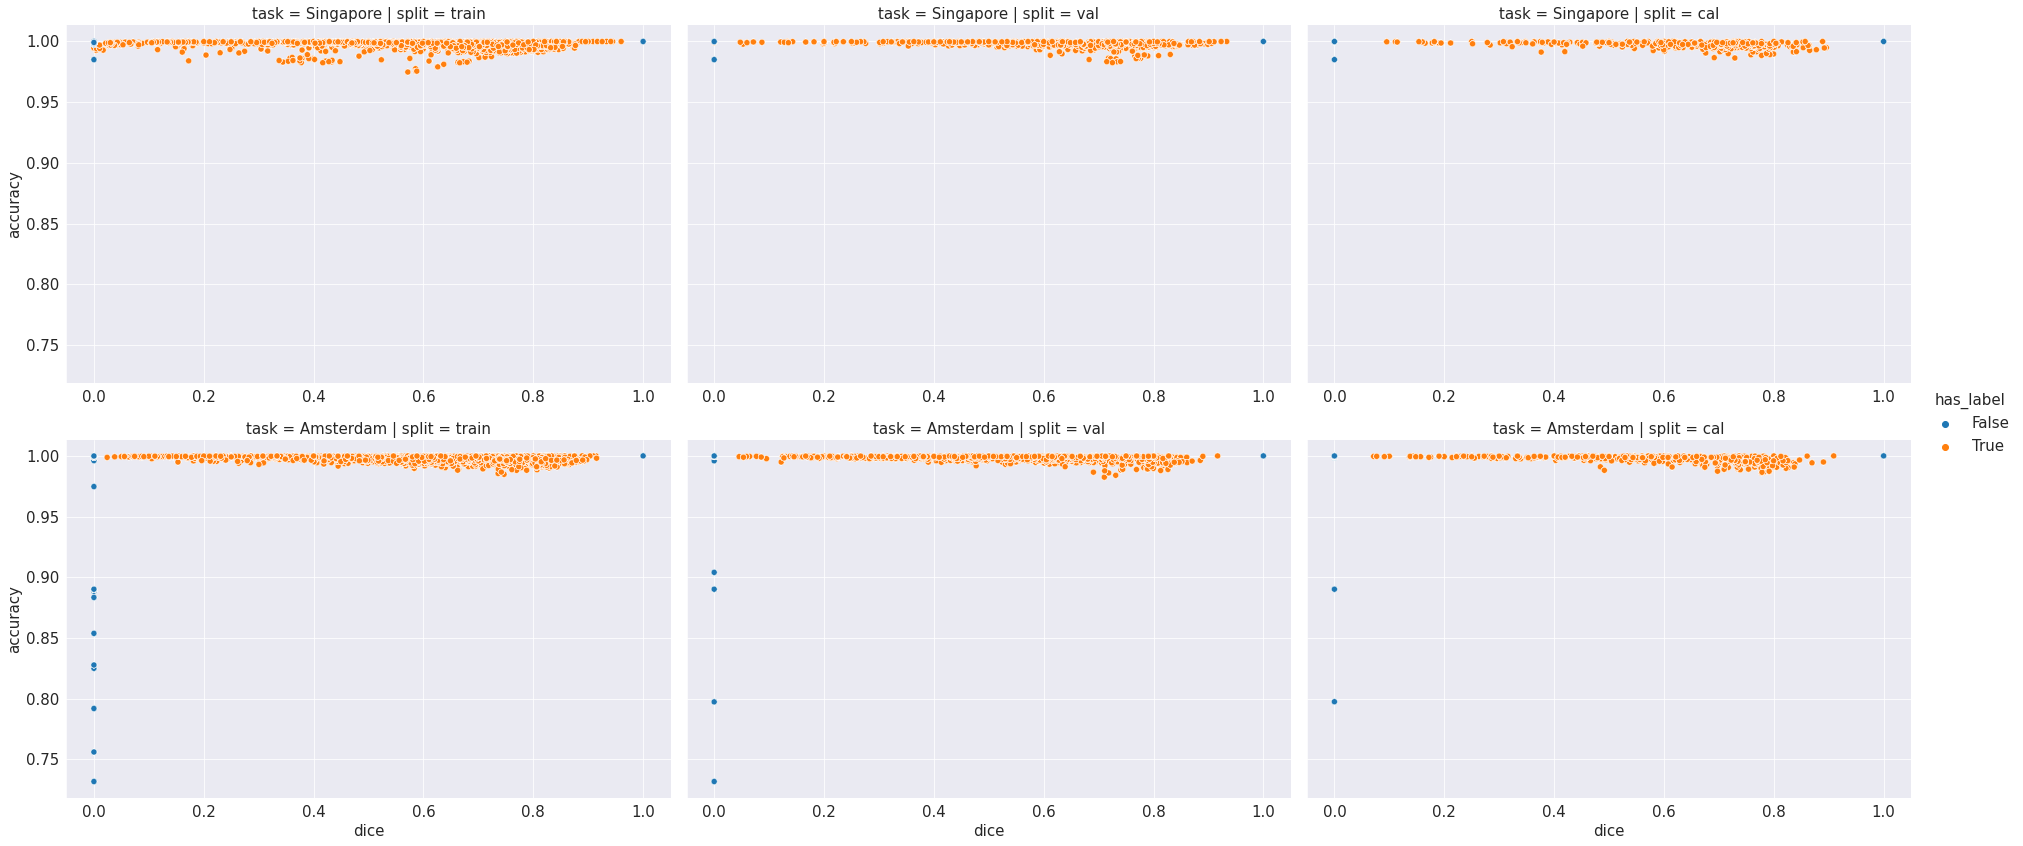

In [36]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='dice',
    y='accuracy',
    row='task',
    col='split',
    kind='scatter',
    hue='has_label',
    height=6,
    facet_kws={"sharex": False},
    aspect=1.5
    )

In [37]:
logs = all_logs[all_logs['has_label'] == True]

# Now we want to collapse the data by subject, so we can get the mean metric score for each subject.
logs_per_subject = all_logs.groupby(['subj_idx', 'metric', 'metric_weighting', 'weighted_metric', 'task', 'split']).agg({
    'label_amount': 'mean',
    'metric_score': 'mean',
    'accuracy': 'mean',
    'dice': 'mean',
    'weighted_accuracy': 'mean'
}).reset_index()

logs_per_subject = reorder_splits(logs_per_subject)

In [38]:
logs_per_subject

subj_idx metric metric_weighting weighted_metric       task  split  \
1           0    ECE          uniform     ECE_uniform  Amsterdam  train   
4           0    ECE          uniform     ECE_uniform  Singapore  train   
7           0    ECE         weighted    ECE_weighted  Amsterdam  train   
10          0    ECE         weighted    ECE_weighted  Singapore  train   
13          0    ESE          uniform     ESE_uniform  Amsterdam  train   
..        ...    ...              ...             ...        ...    ...   
215         6    ECE         weighted    ECE_weighted  Amsterdam    cal   
220         6    ESE          uniform     ESE_uniform  Amsterdam    cal   
225         6    ESE         weighted    ESE_weighted  Amsterdam    cal   
230         6   ReCE          uniform    ReCE_uniform  Amsterdam    cal   
235         6   ReCE         weighted   ReCE_weighted  Amsterdam    cal   

     label_amount  metric_score  accuracy      dice  weighted_accuracy  
1        7.746094      0.116168  0.999841  0.743614           0.912939  
4      314.496094      0.069343  0.997388  0.820527           0.907223  
7        7.746094      0.144463  0.999841  0.743614           0.912939  
10     314.496094      0.069428  0.997388  0.820527           0.907223  
13       7.746094      0.087523  0.999841  0.743614           0.912939  
..            ...           ...       ...       ...                ...  
215     13.371094      0.190455  0.999743  0.673523           0.926637  
220     13.371094      0.121374  0.999743  0.673523           0.926637  
225     13.371094      0.000851  0.999743  0.673523           0.926637  
230     13.371094      0.154866  0.999743  0.673523           0.926637  
235     13.371094      0.136570  0.999743  0.673523           0.926637  

[648 rows x 11 columns]

# Now for the graph we really care about, let's look at how each metric/weighting correlates first with dice.

In [39]:
# Define the color palette
metric_weight_palette = {
    'ECE_uniform': 'red',  # red
    'ECE_weighted': 'tomato',  # green
    'ESE_uniform': 'blue',  # blue
    'ESE_weighted': 'royalblue',  # yellow
    'ReCE_uniform': 'forestgreen',
    'ReCE_weighted': 'limegreen'
}

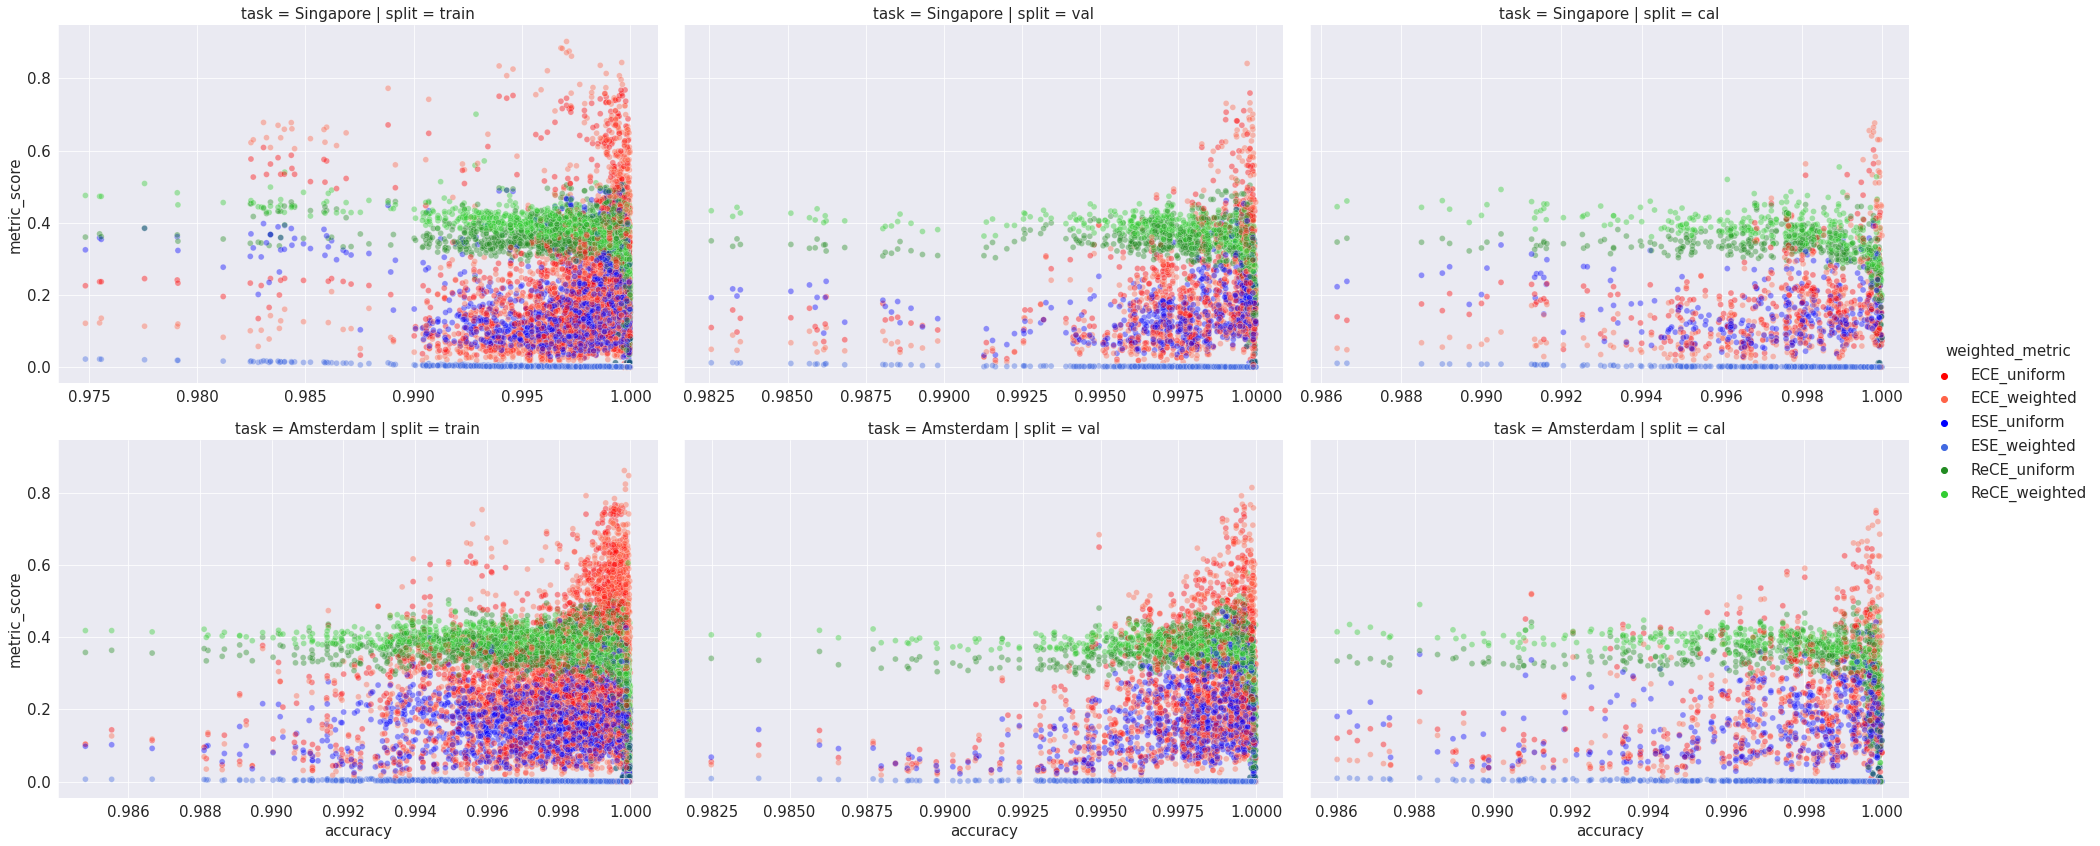

In [40]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='accuracy',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.4,
    aspect=1.5
    )

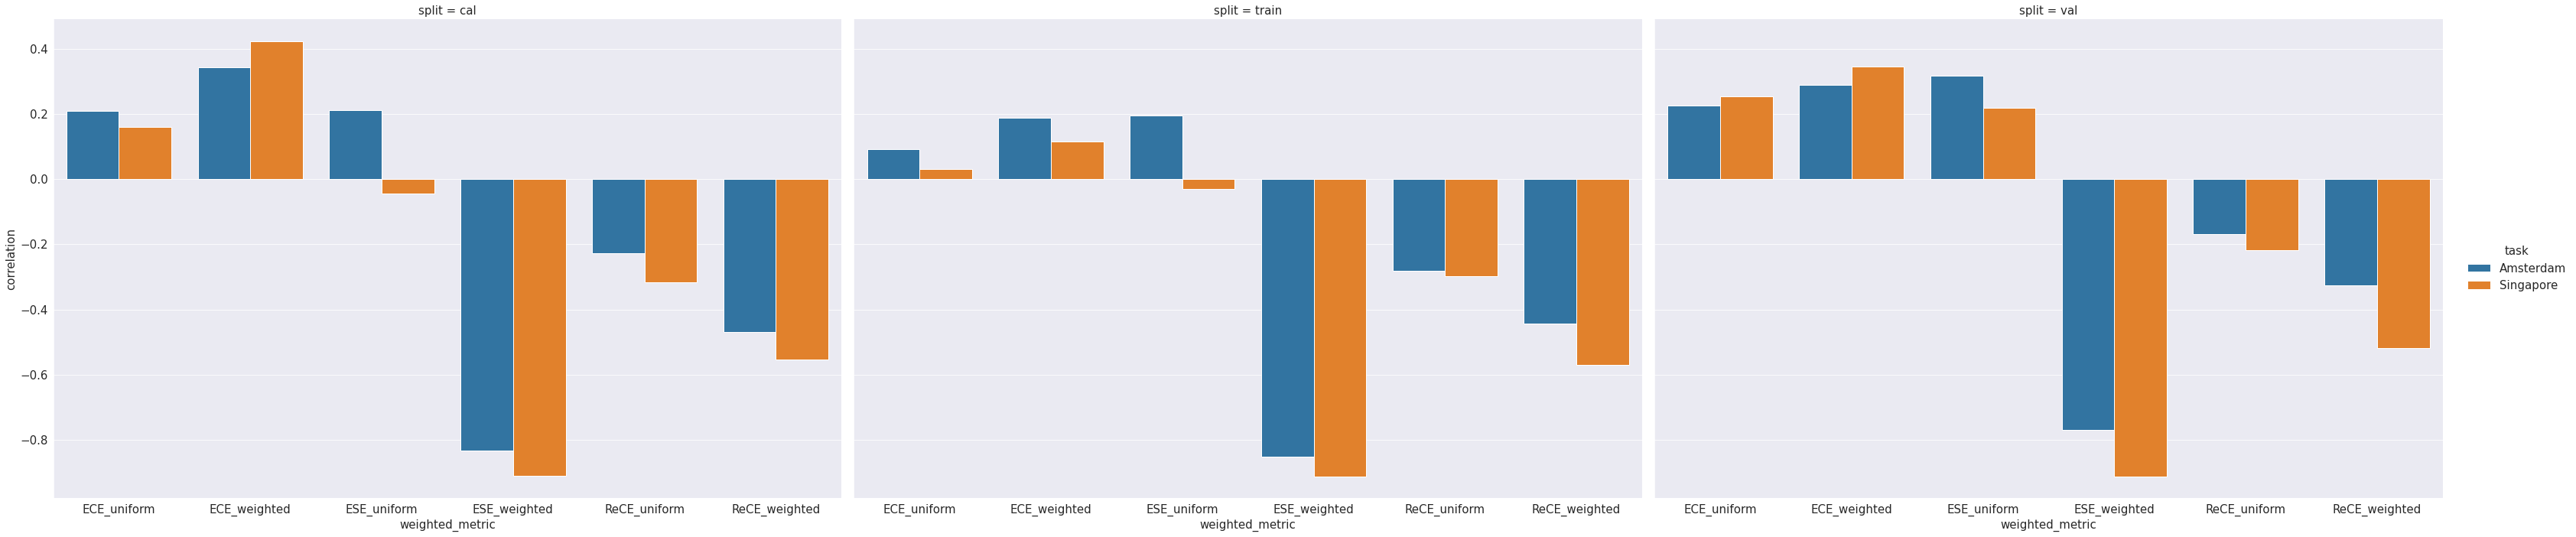

In [66]:
# Group by the three columns and apply correlation
correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['accuracy'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

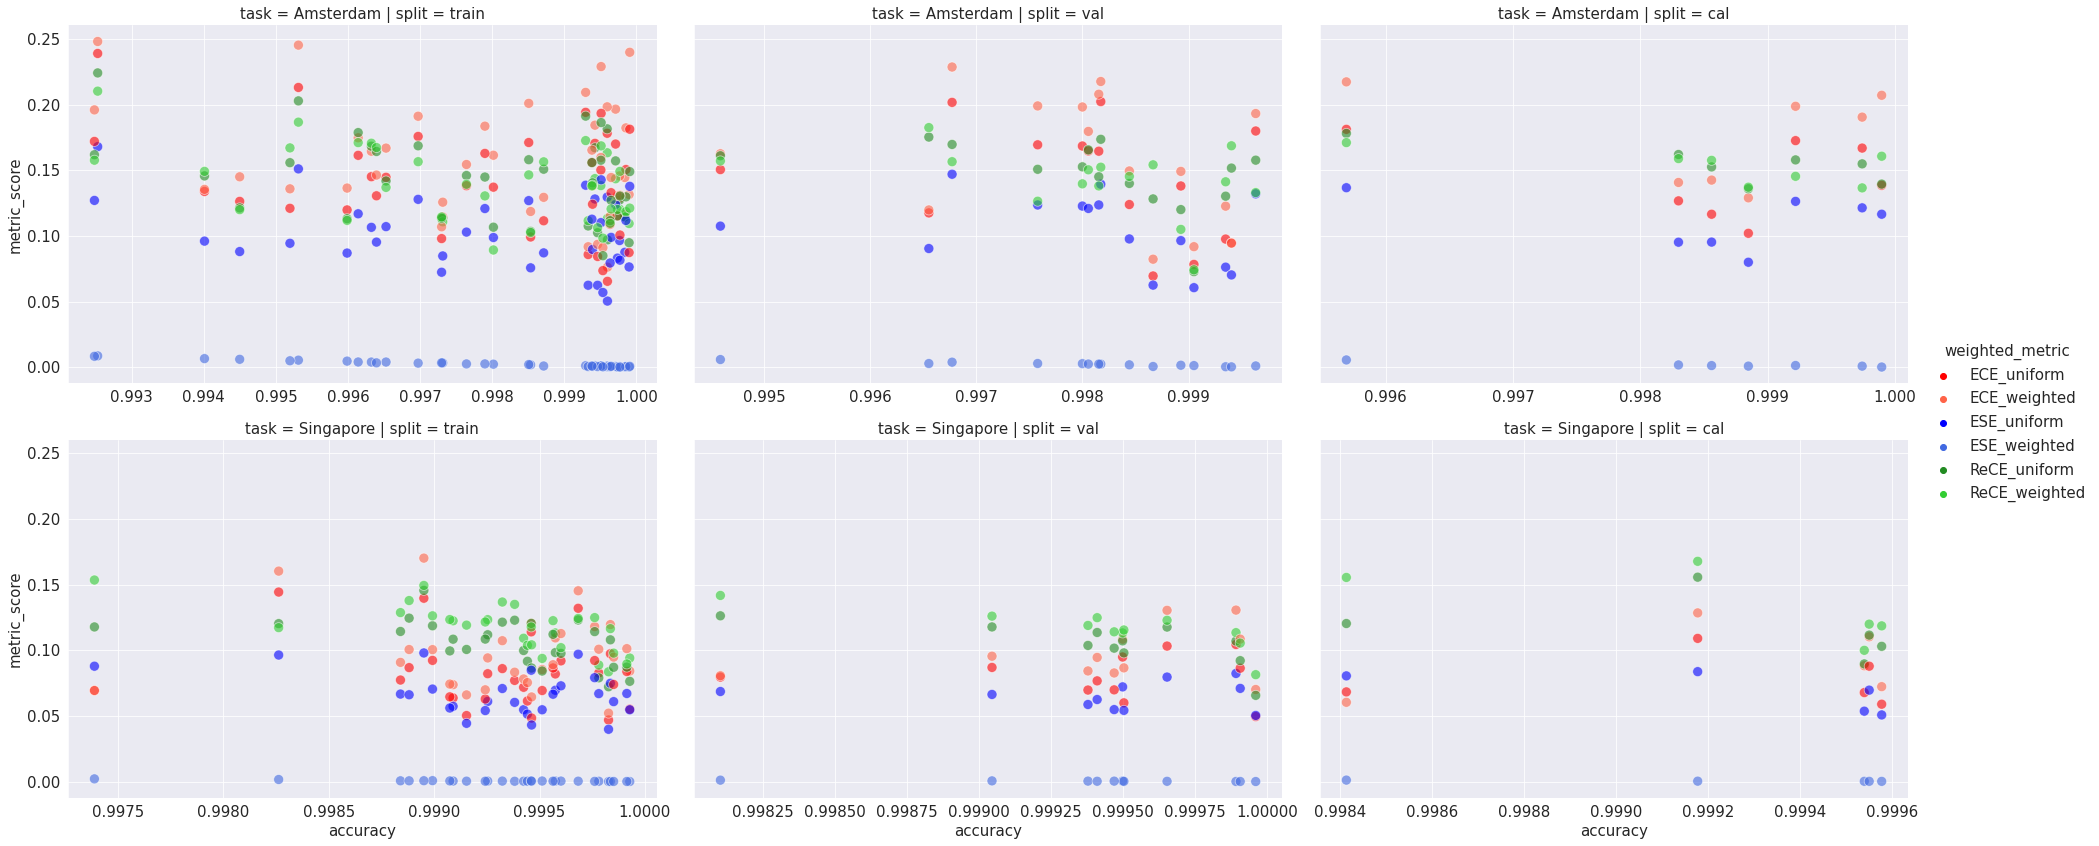

In [42]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='accuracy',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

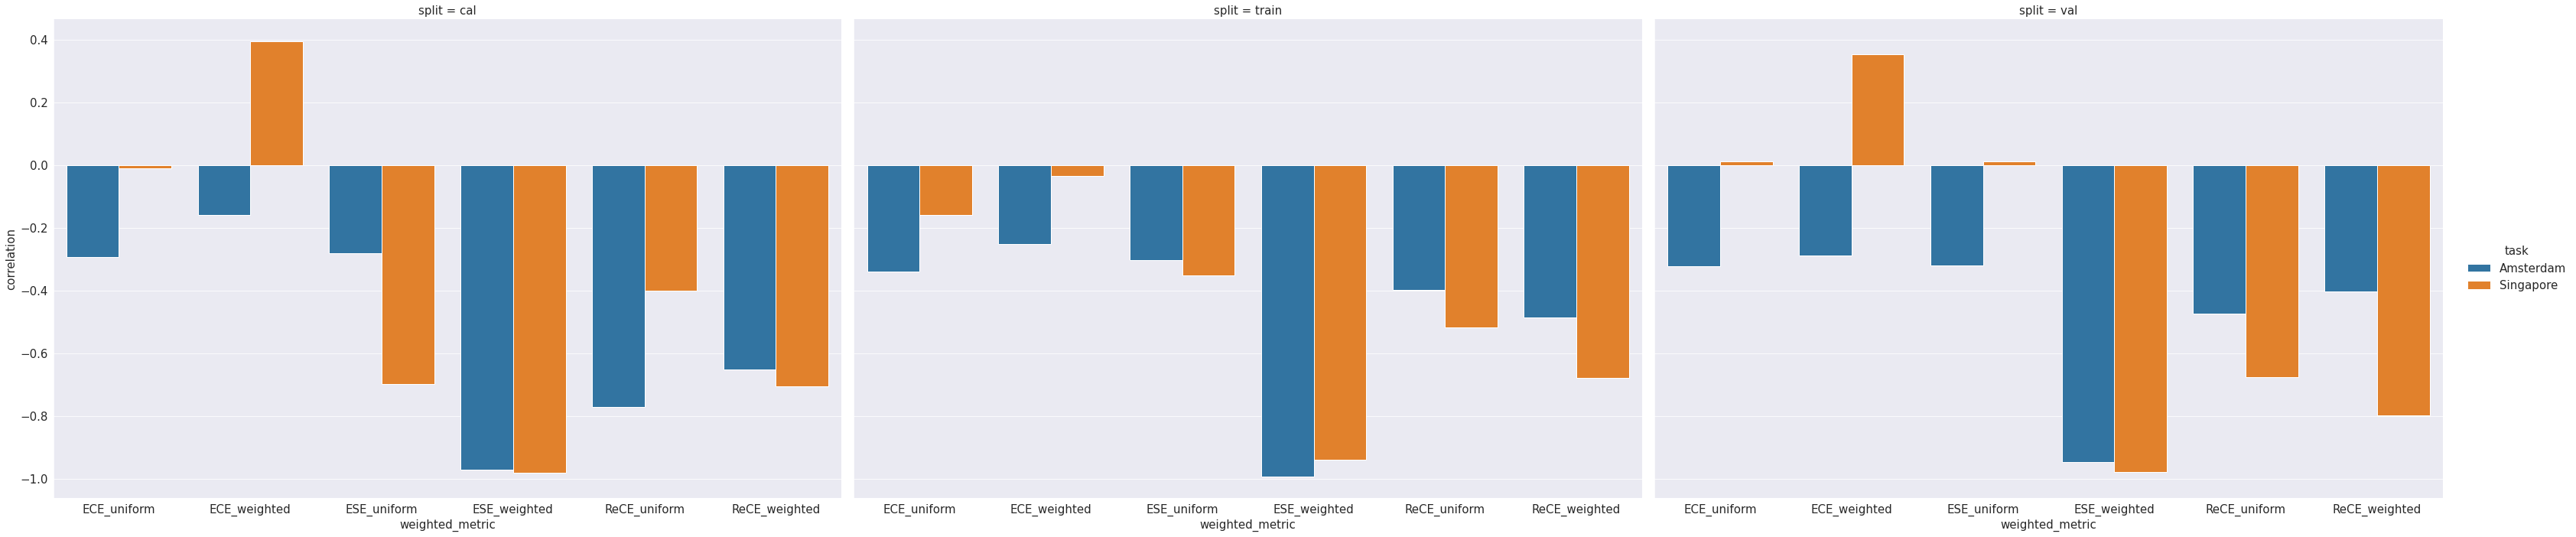

In [43]:
# Group by the three columns and apply correlation
subject_correlations = logs_per_subject.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['accuracy'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=subject_correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

# Now how well does it correspond with dice score?

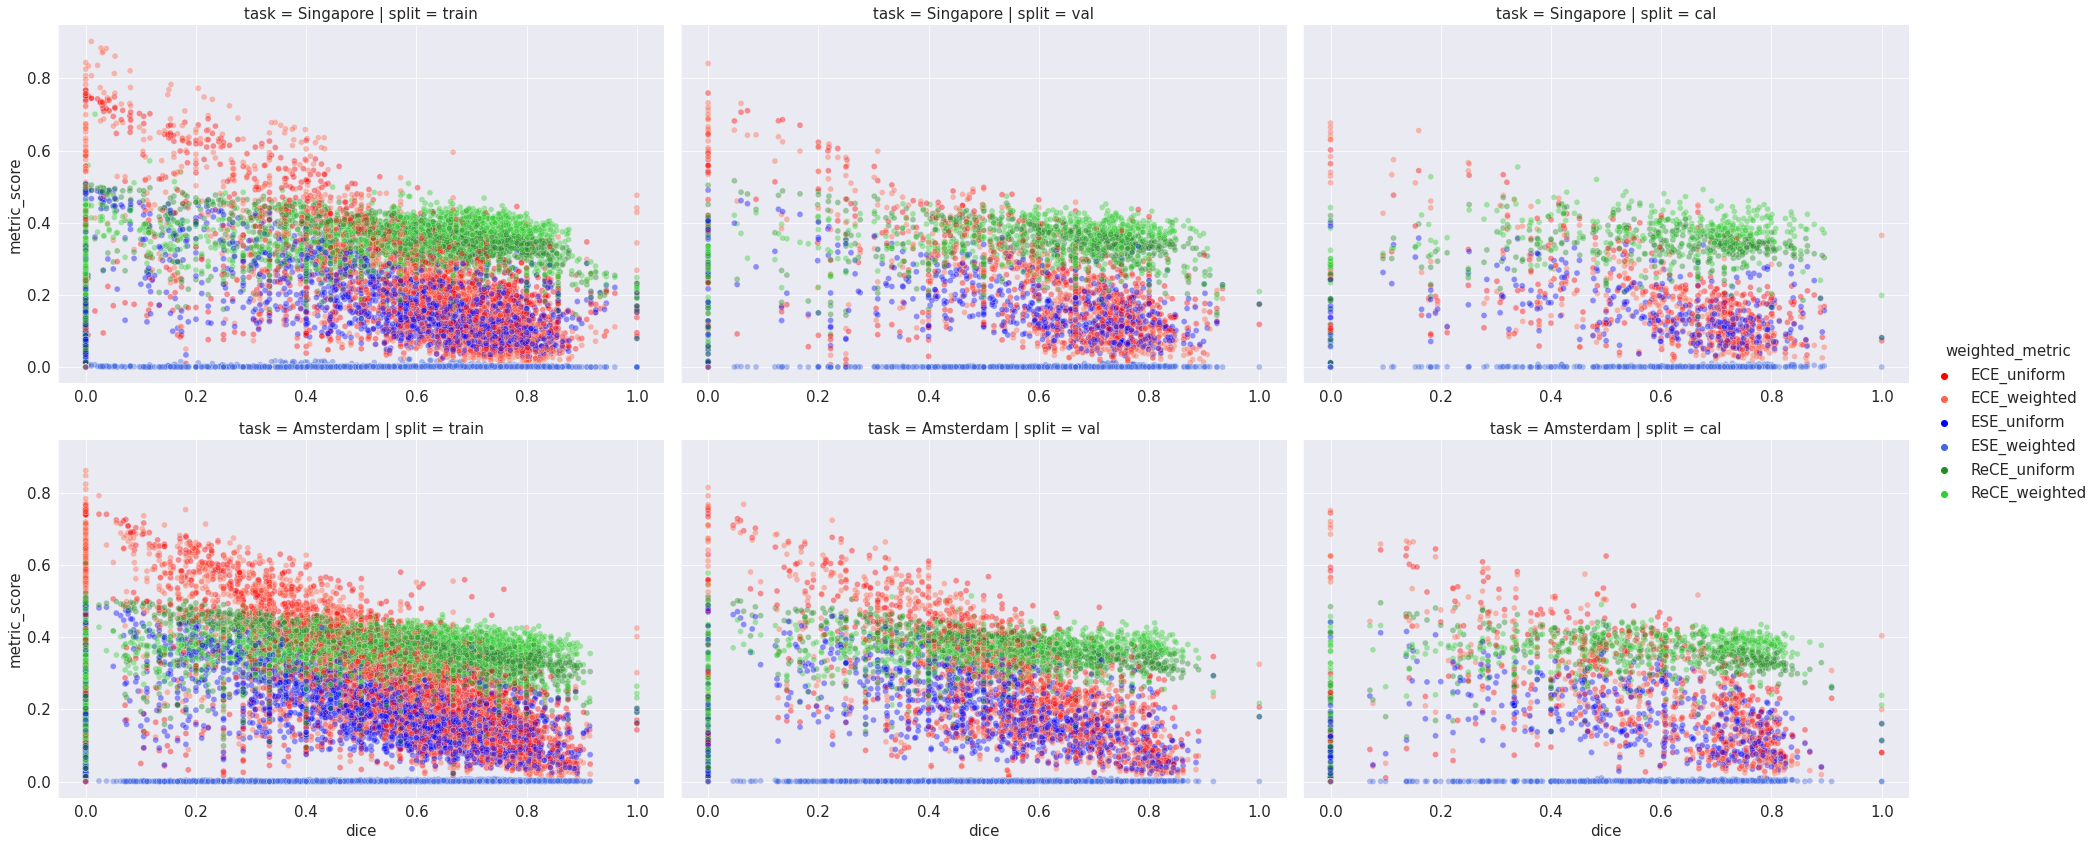

In [44]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='dice',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.4,
    aspect=1.5
    )

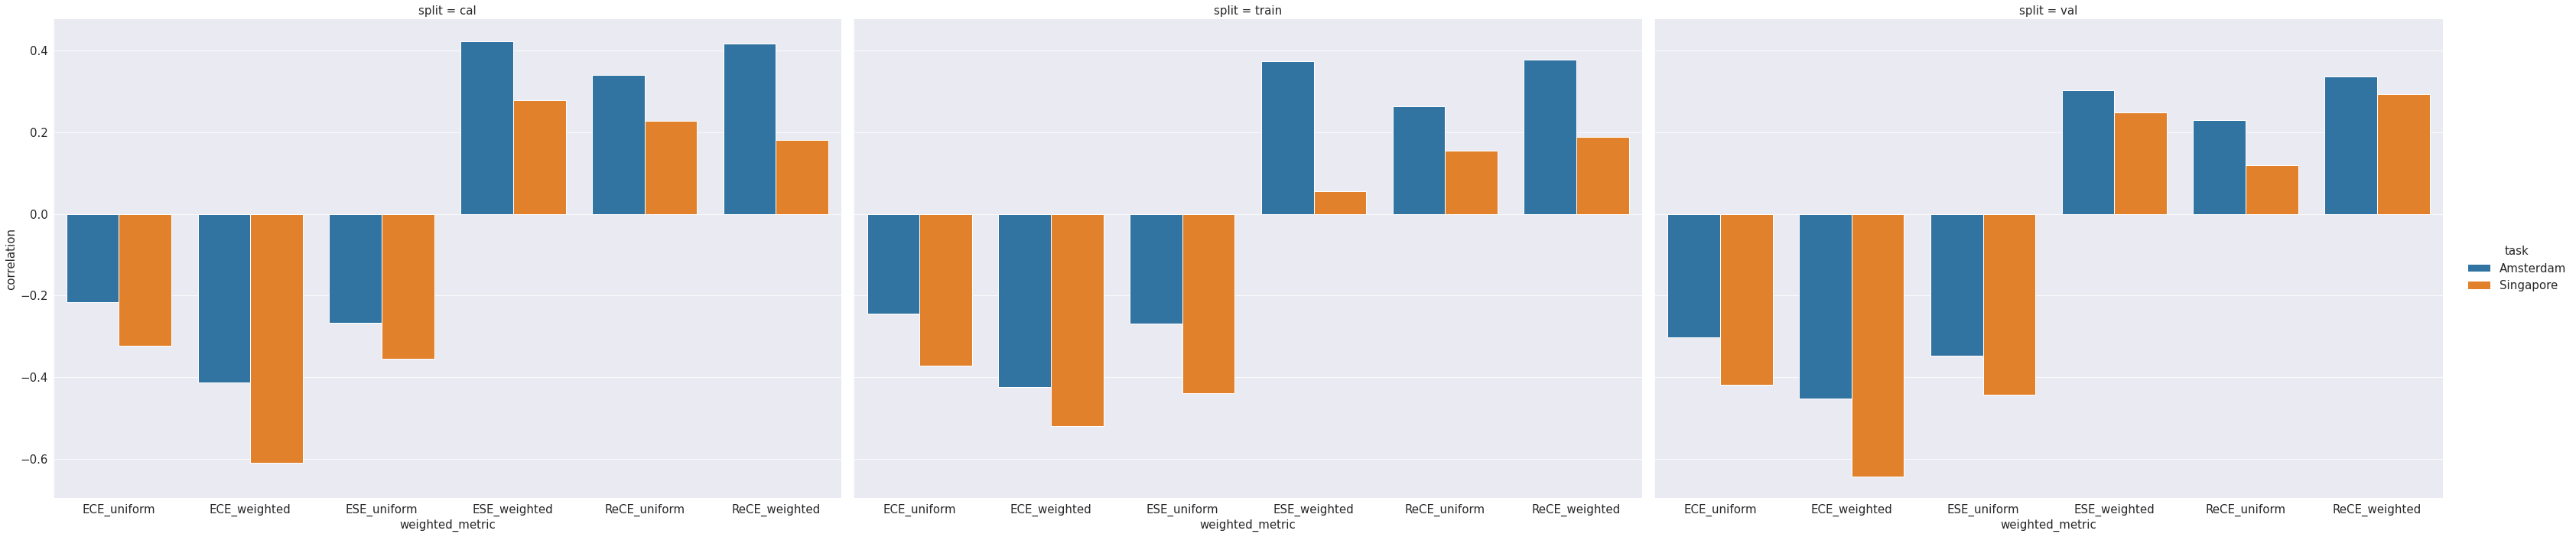

In [45]:
# Group by the three columns and apply correlation
correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

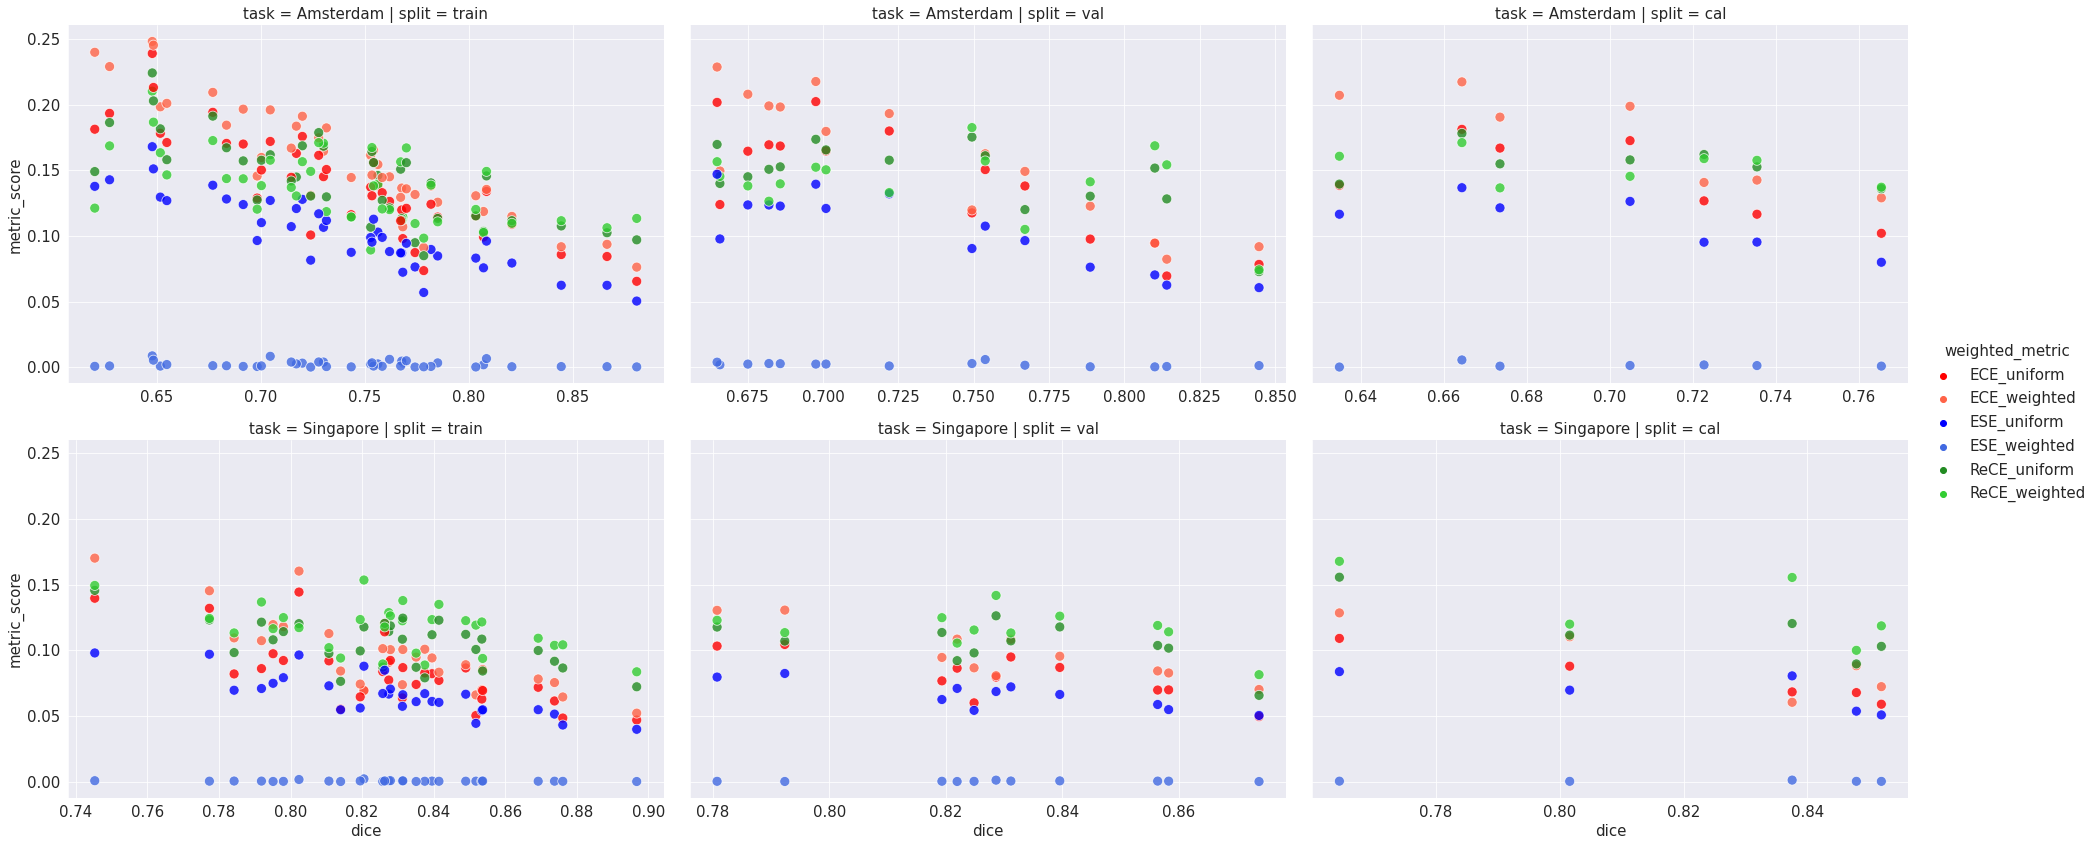

In [46]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='dice',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.8,
    aspect=1.5
    )

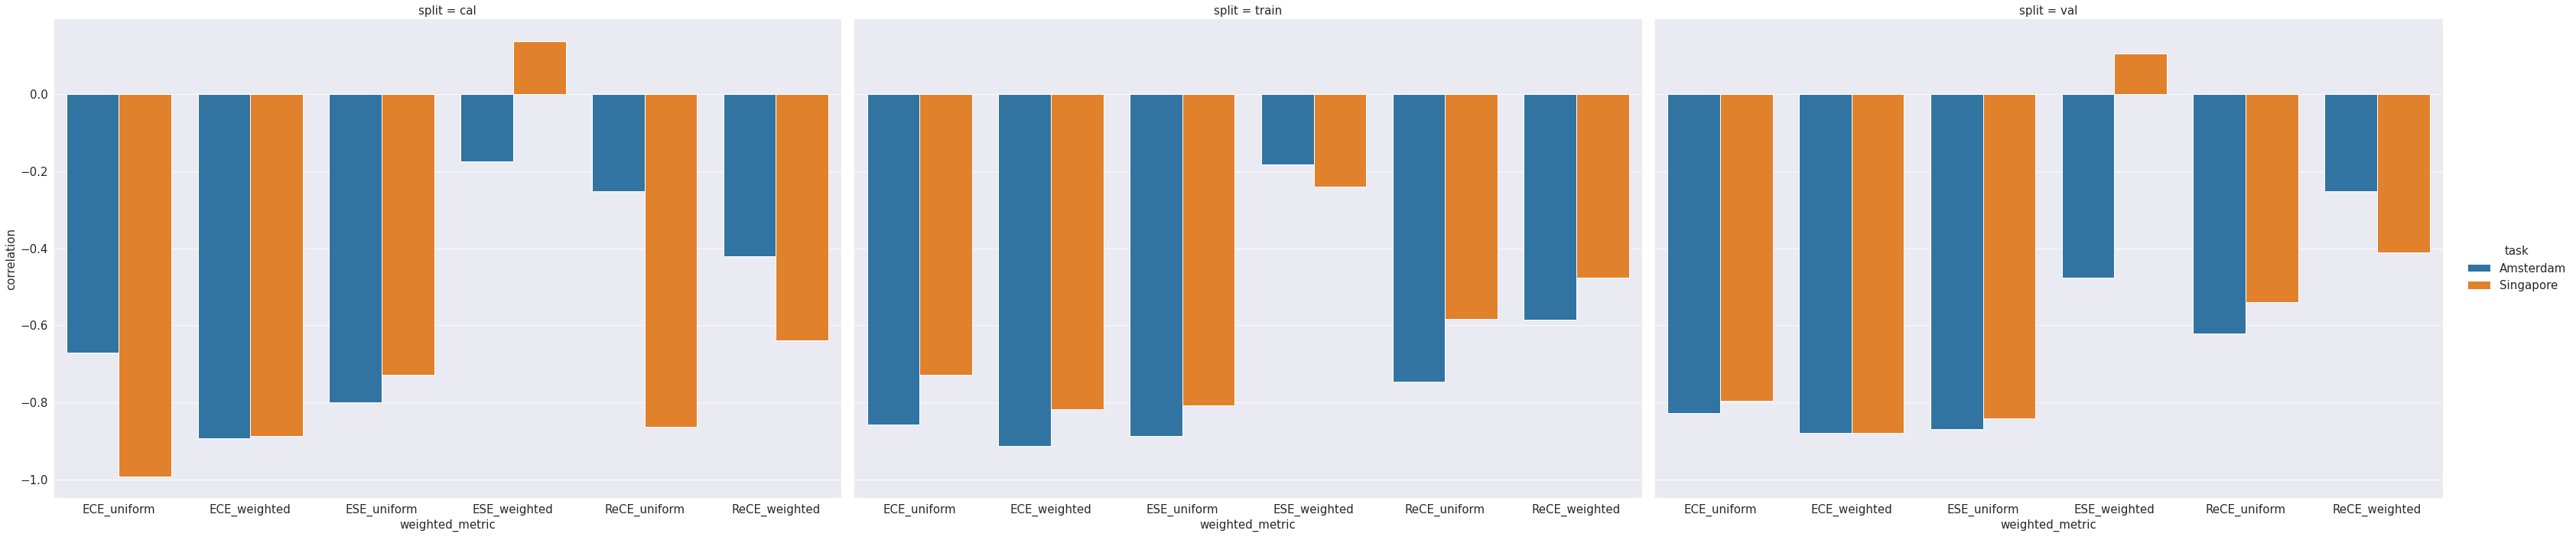

In [47]:
# Group by the three columns and apply correlation
subject_correlations = logs_per_subject.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=subject_correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

# Or how they correlate with the amount of label in the groundtruth segmentation.

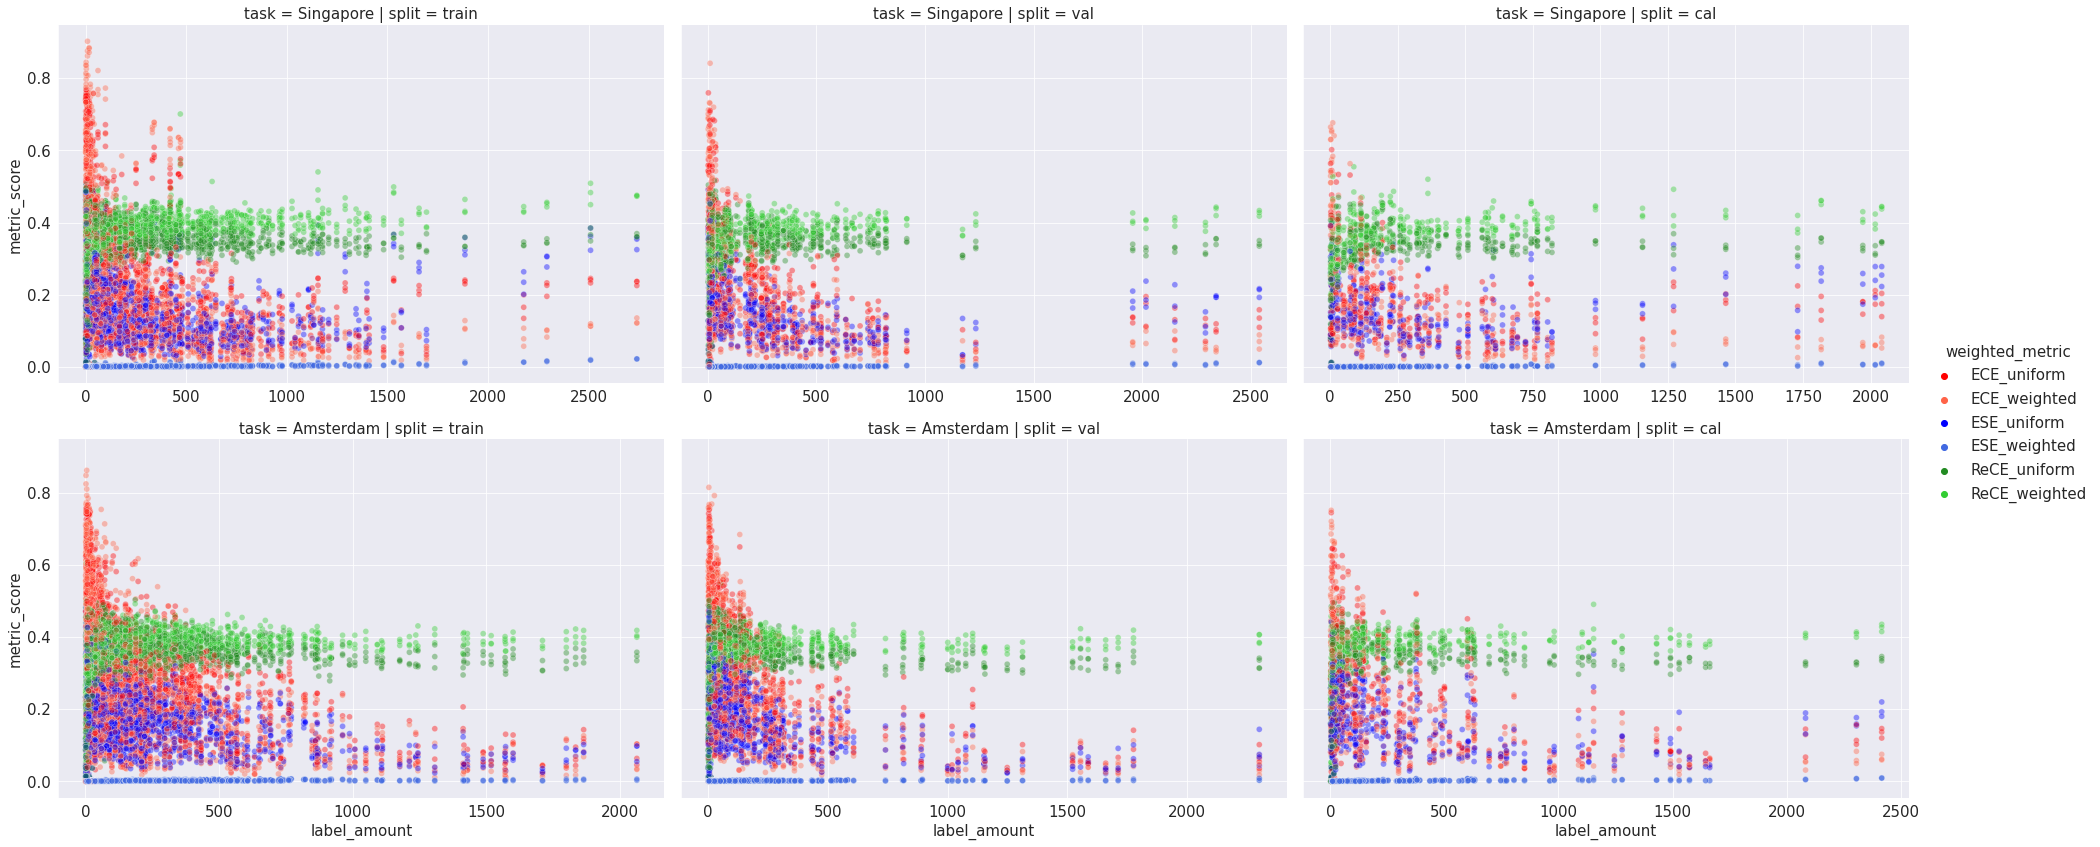

In [48]:
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='label_amount',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.4,
    aspect=1.5
   )


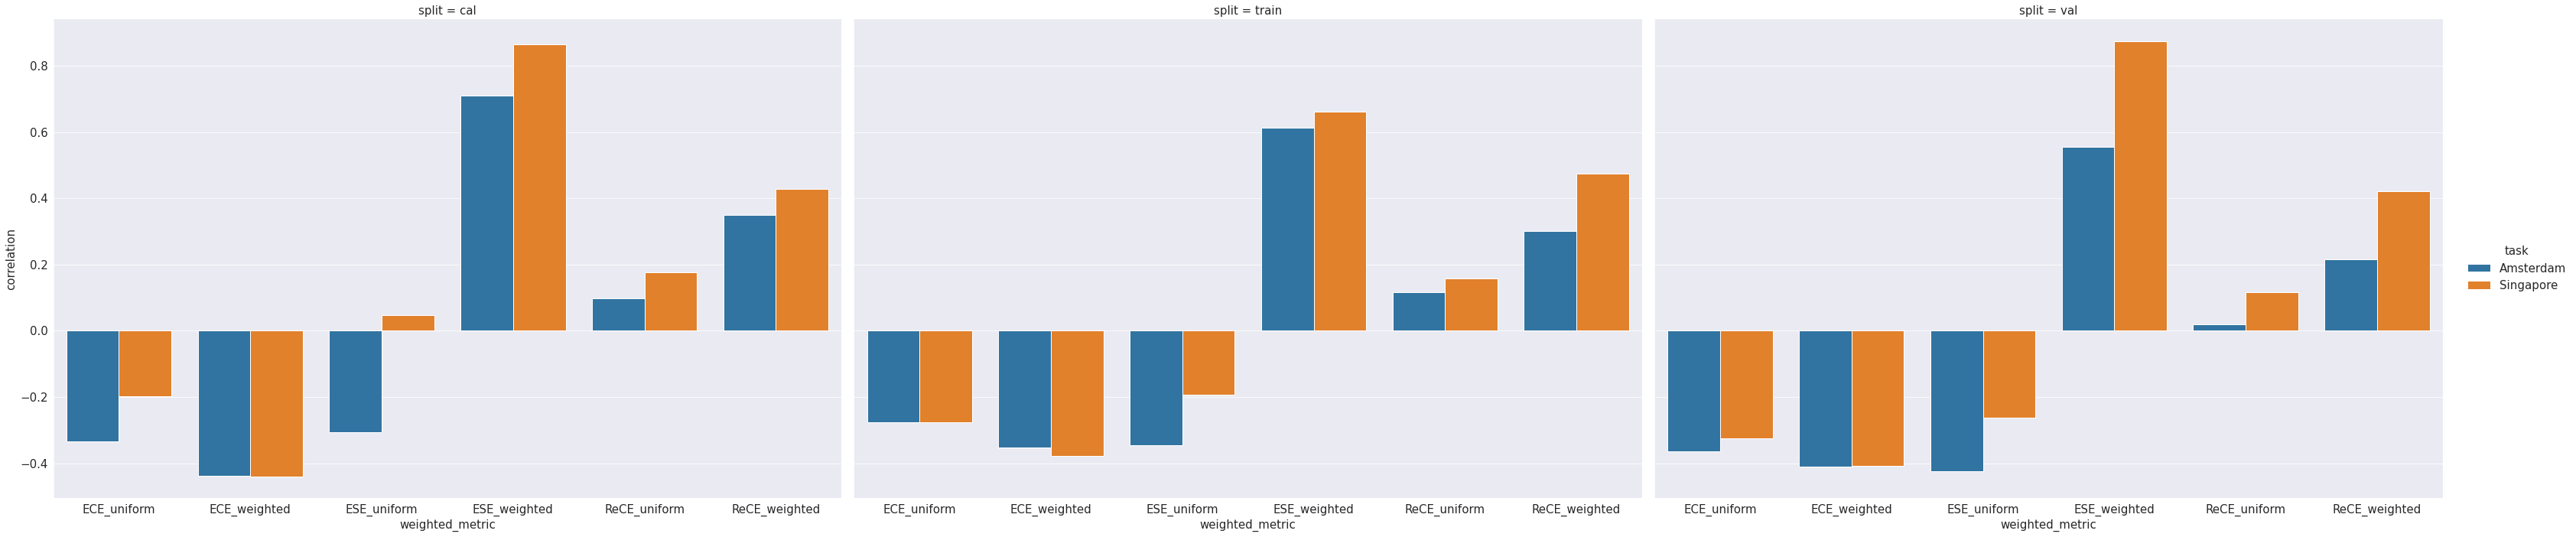

In [49]:
# Group by the three columns and apply correlation
correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

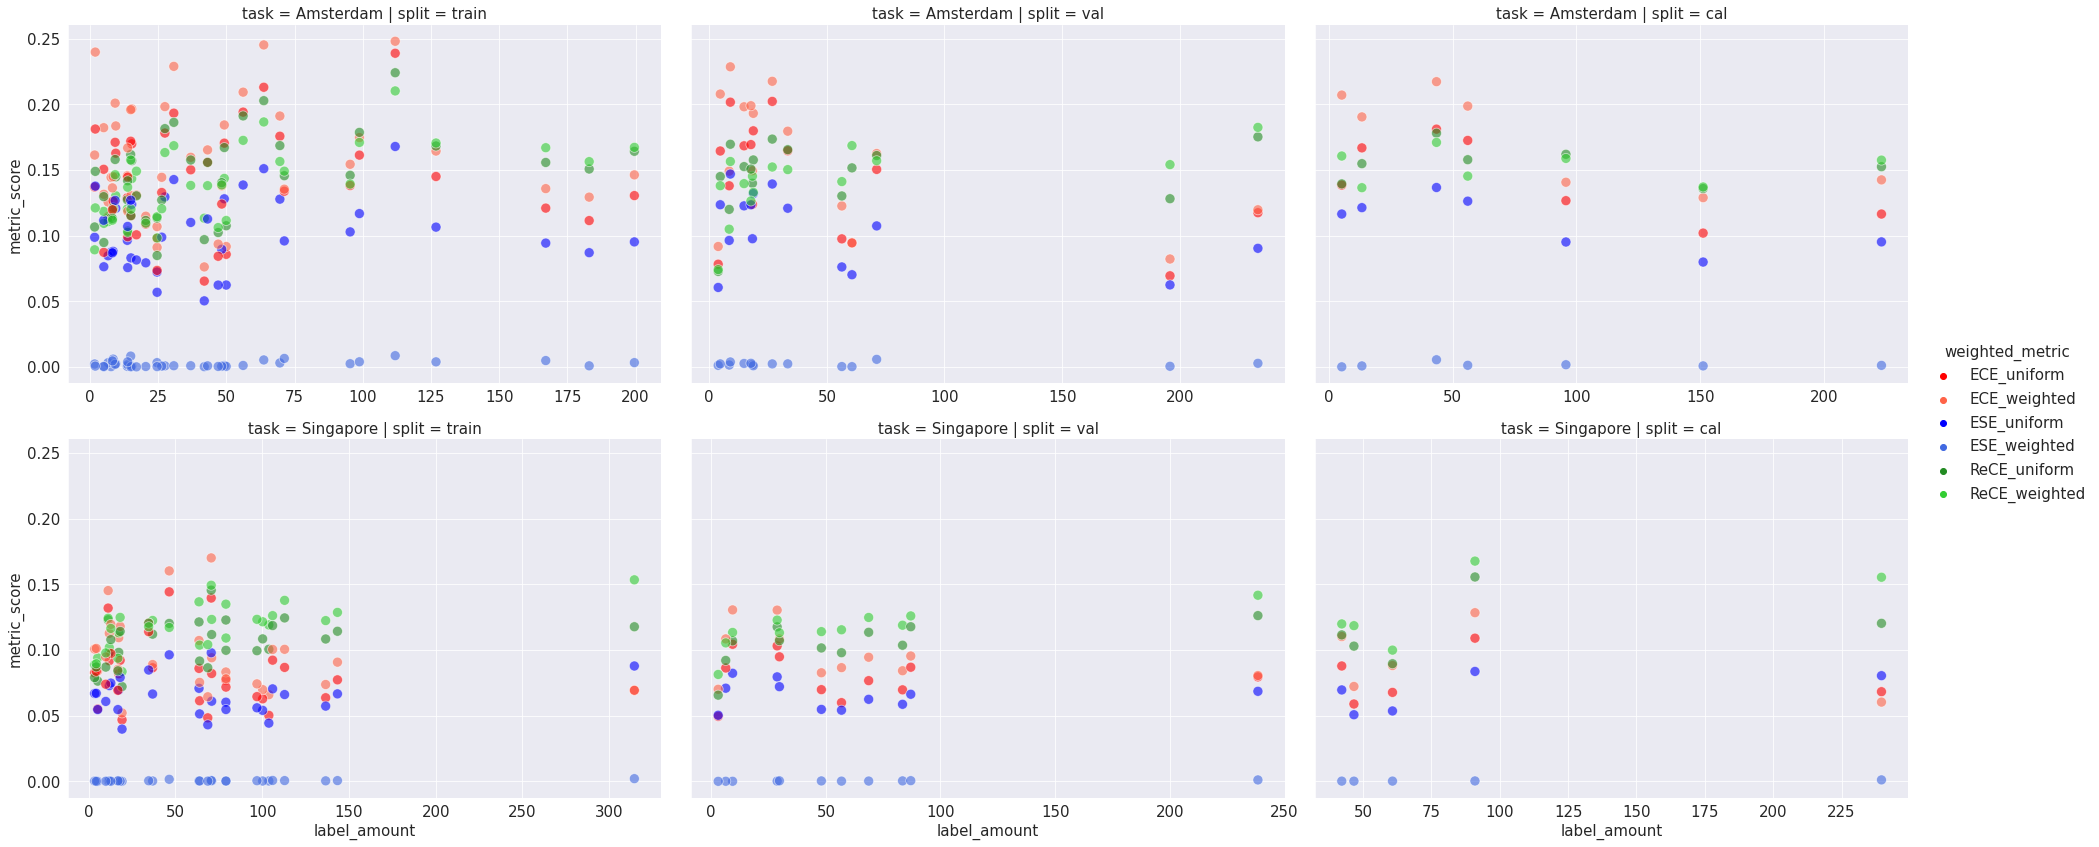

In [50]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='label_amount',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

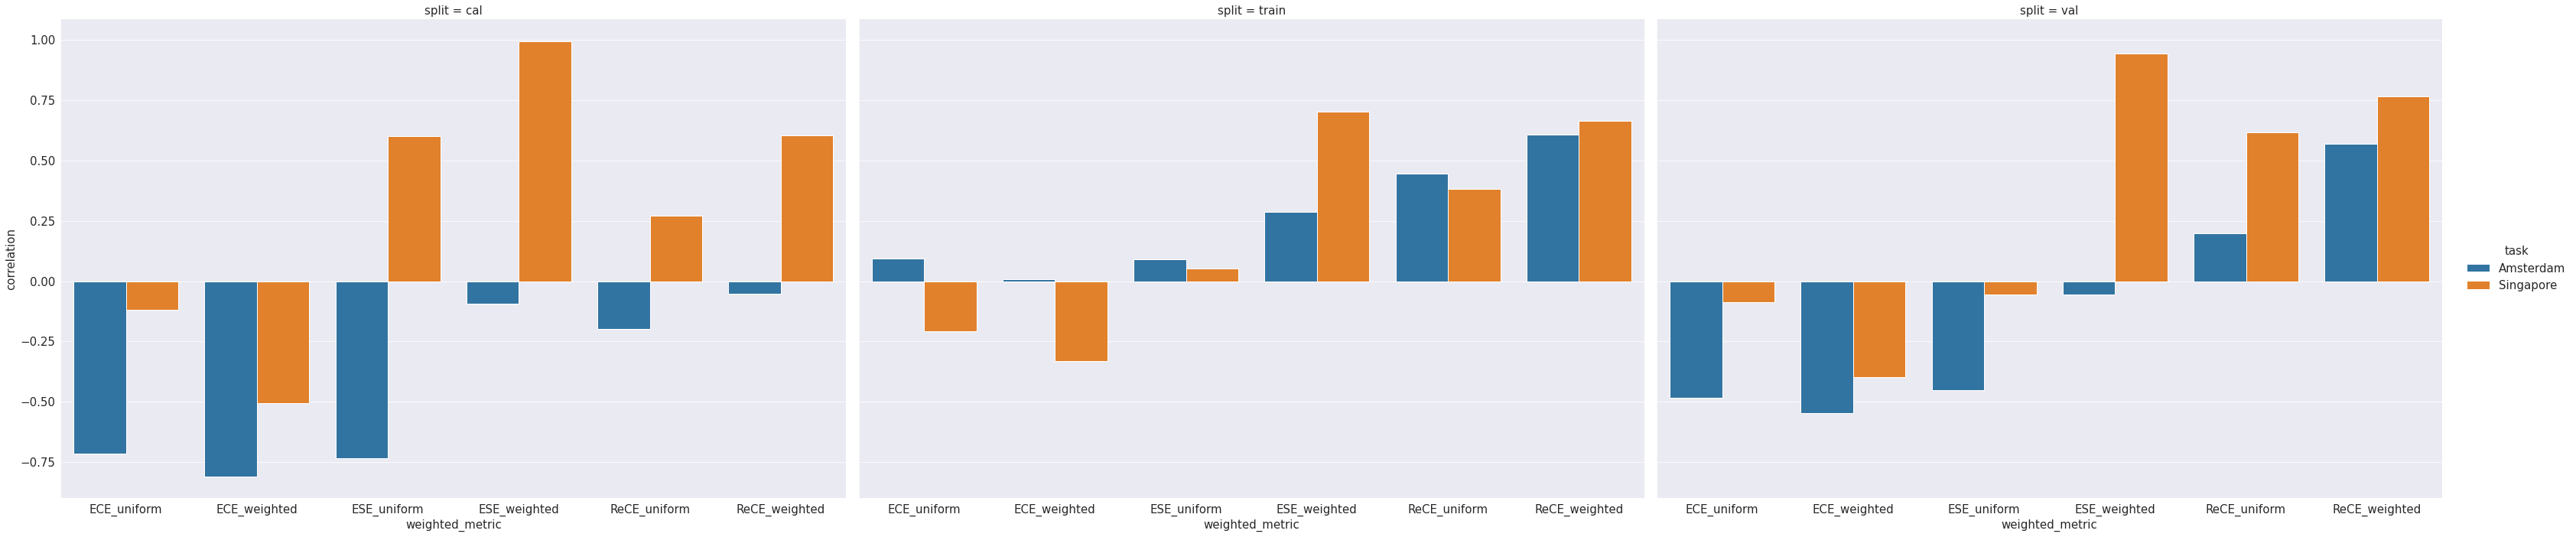

In [57]:
# Group by the three columns and apply correlation
subject_correlations = logs_per_subject.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=subject_correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

# Finally we can look at weighted accuracy as well.

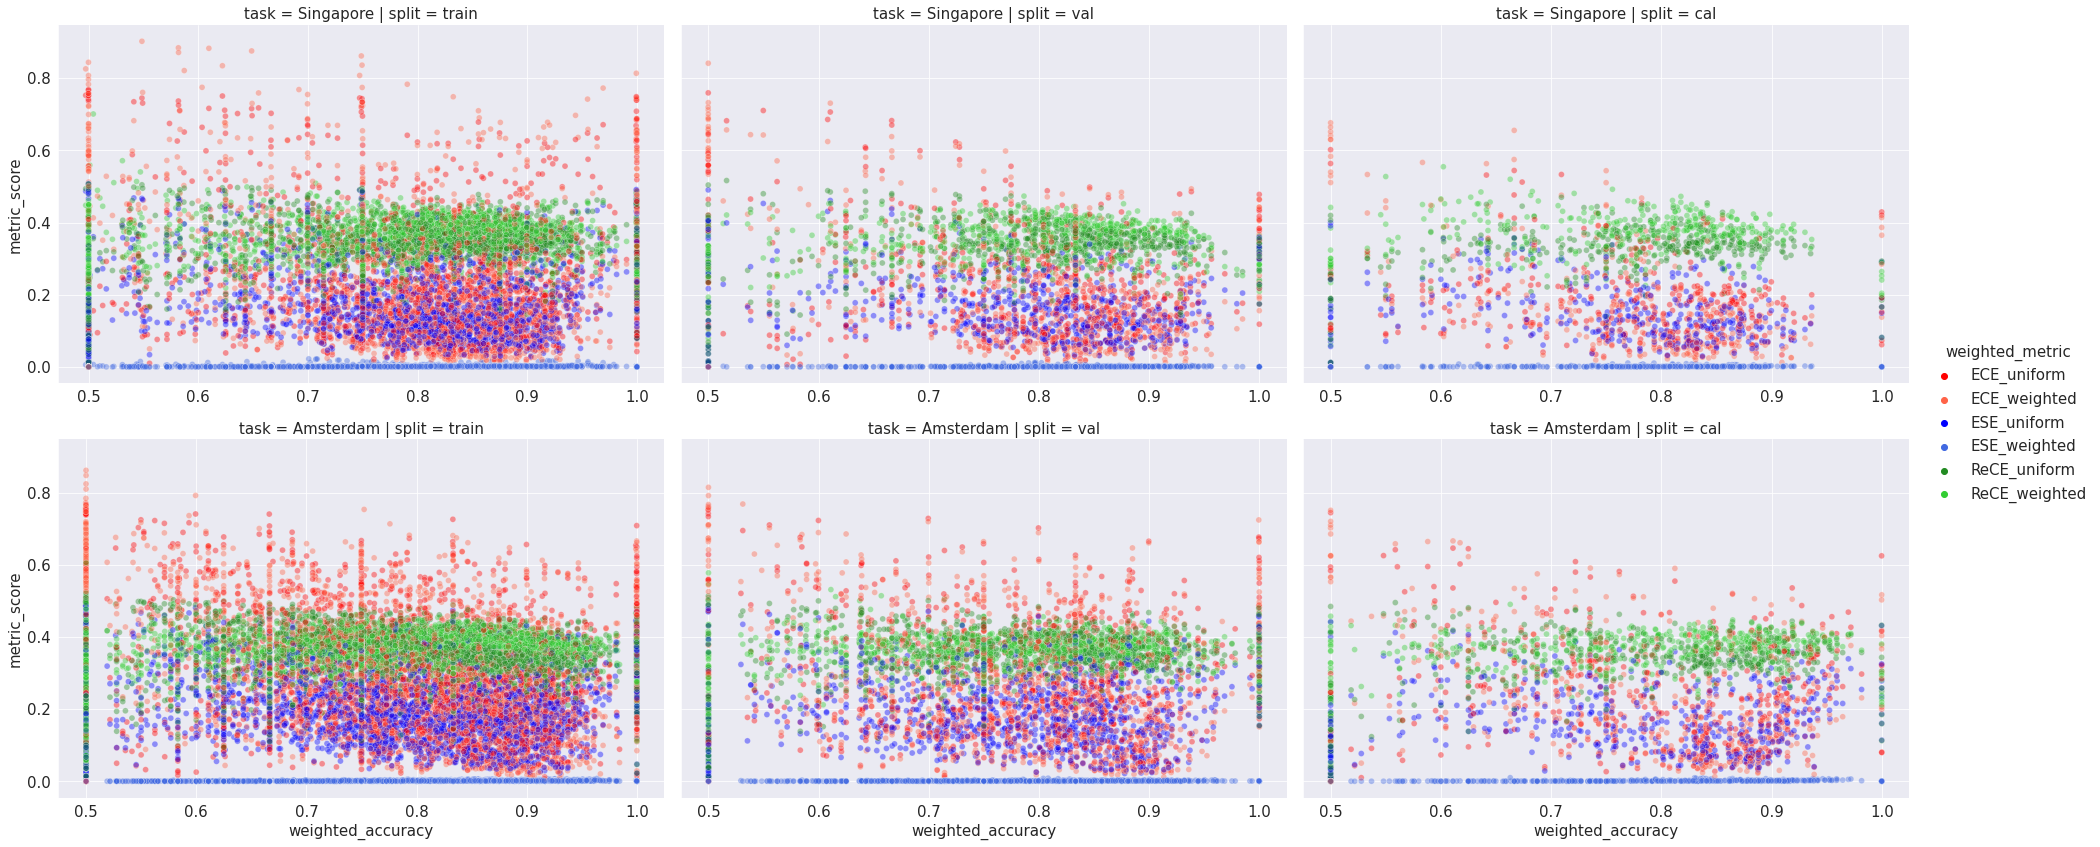

In [52]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='weighted_accuracy',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.4,
    aspect=1.5
)

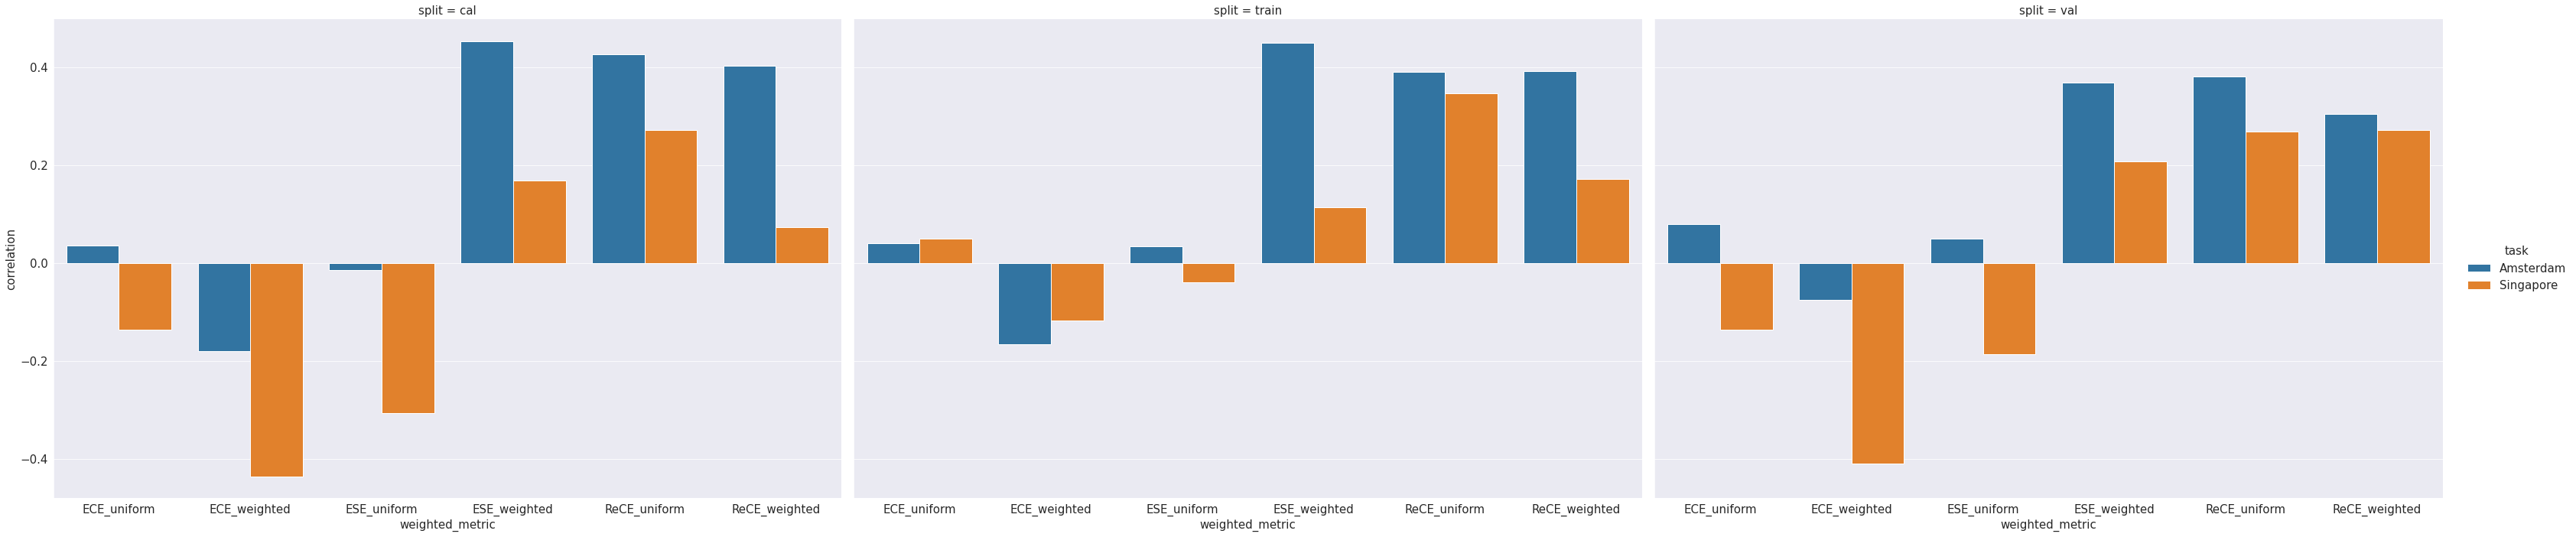

In [53]:
# Group by the three columns and apply correlation
correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['weighted_accuracy'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

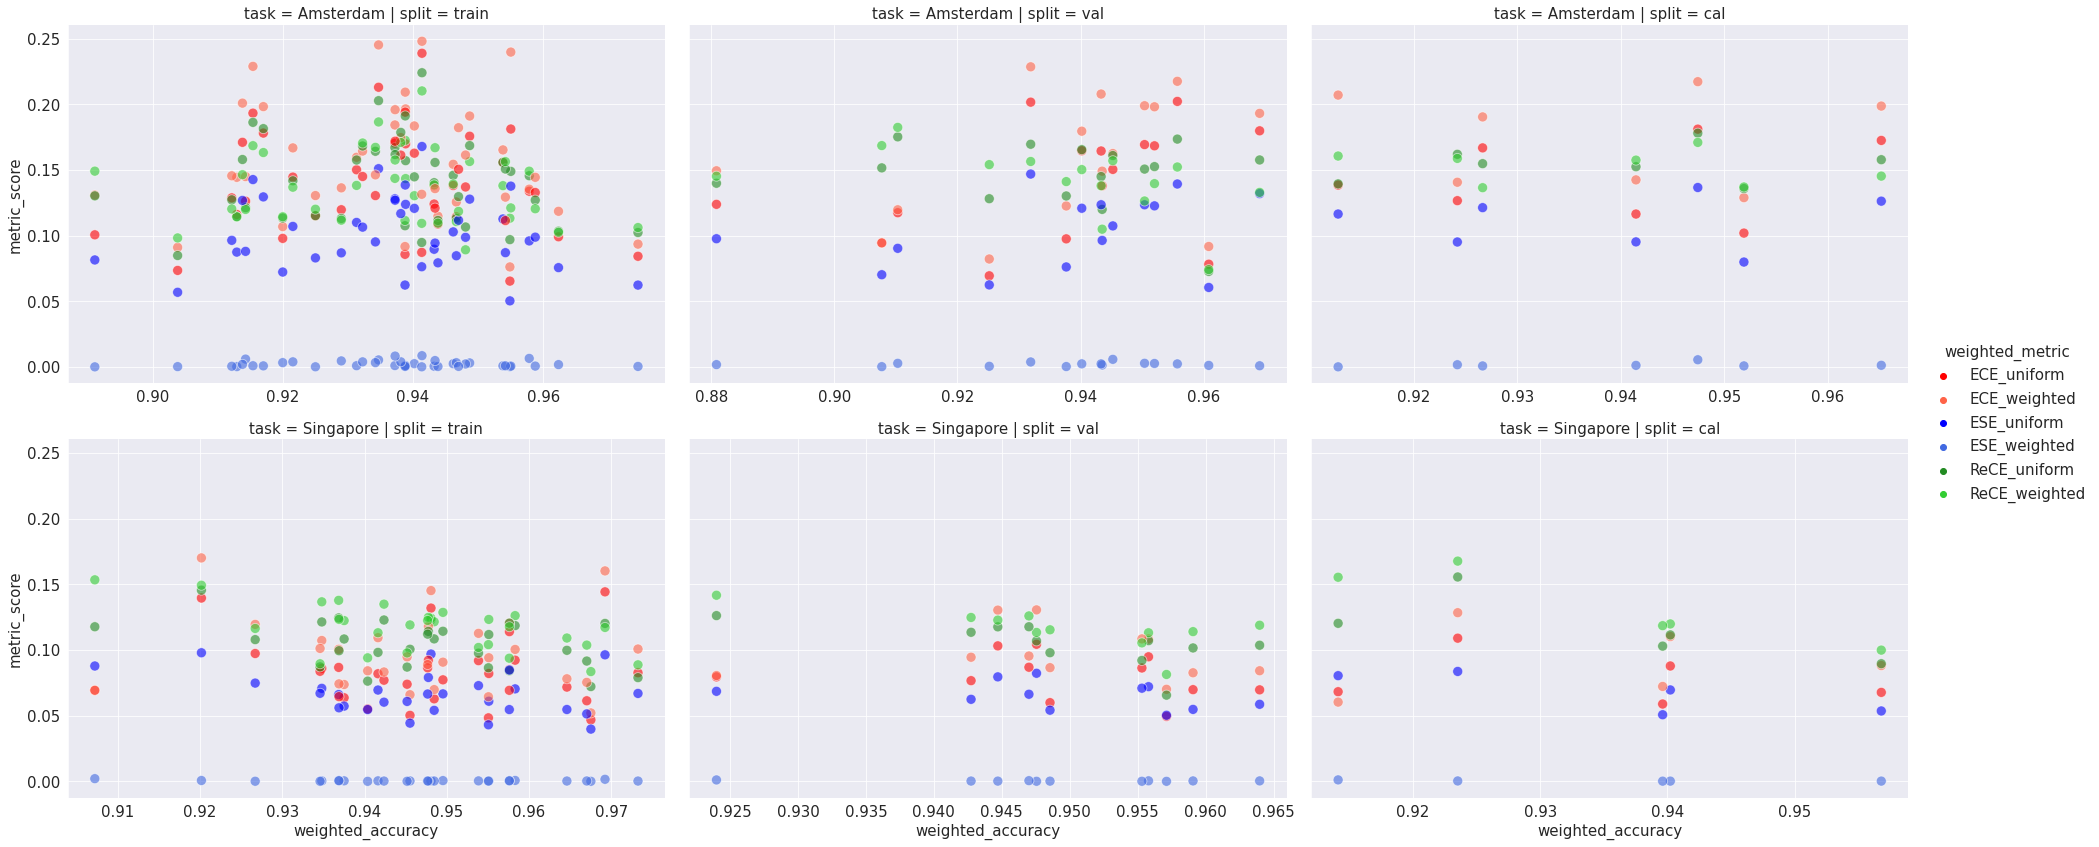

In [54]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='weighted_accuracy',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

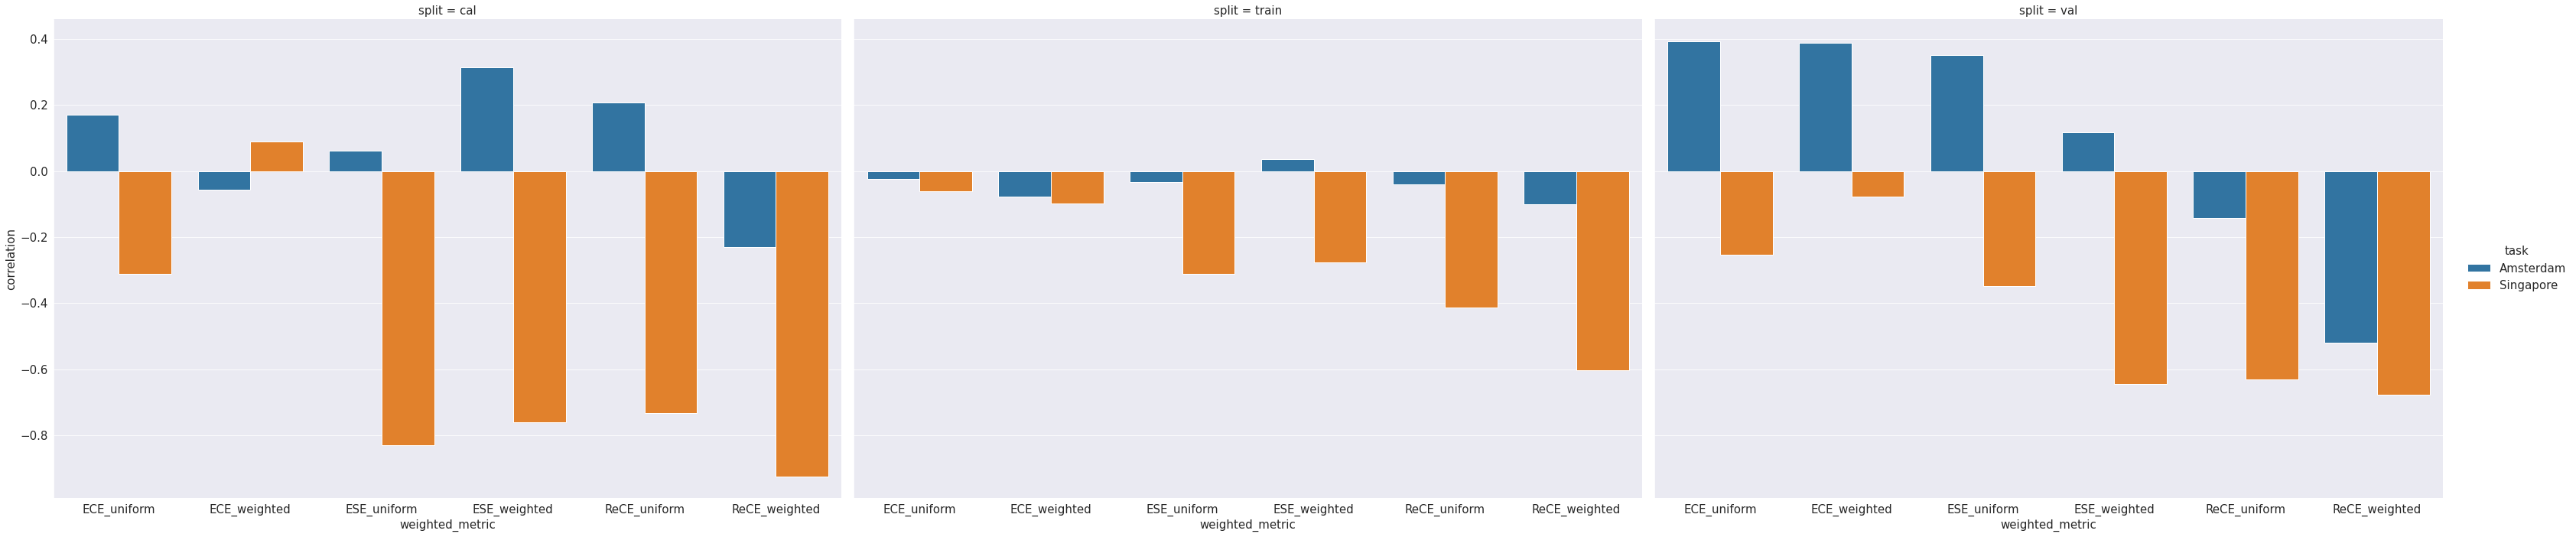

In [55]:
# Group by the three columns and apply correlation
subject_correlations = logs_per_subject.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['weighted_accuracy'].corr(x['metric_score'])).reset_index(name='correlation')
sns.catplot(data=subject_correlations, x="weighted_metric", y="correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)